In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest,f_regression
from scipy.stats import pointbiserialr
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [233]:
data = pd.read_csv('data/train_BRCpofr.csv')
data = data.drop('id',axis=1)
data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [234]:
data.shape

(89392, 11)

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          89392 non-null  object
 1   area            89392 non-null  object
 2   qualification   89392 non-null  object
 3   income          89392 non-null  object
 4   marital_status  89392 non-null  int64 
 5   vintage         89392 non-null  int64 
 6   claim_amount    89392 non-null  int64 
 7   num_policies    89392 non-null  object
 8   policy          89392 non-null  object
 9   type_of_policy  89392 non-null  object
 10  cltv            89392 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 7.5+ MB


In [236]:
def show_count(col):
    categories_count = data[col].nunique()
    categories_list = data[col].unique()
    print('Number of categories =',categories_count)
    print('The categories are =',categories_list)

In [237]:
categoricals = ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']

In [238]:
for col in categoricals:
    print('Feature Name: ',col)
    show_count(col)

Feature Name:  gender
Number of categories = 2
The categories are = ['Male' 'Female']
Feature Name:  area
Number of categories = 2
The categories are = ['Urban' 'Rural']
Feature Name:  qualification
Number of categories = 3
The categories are = ['Bachelor' 'High School' 'Others']
Feature Name:  income
Number of categories = 4
The categories are = ['5L-10L' 'More than 10L' '2L-5L' '<=2L']
Feature Name:  num_policies
Number of categories = 2
The categories are = ['More than 1' '1']
Feature Name:  policy
Number of categories = 3
The categories are = ['A' 'C' 'B']
Feature Name:  type_of_policy
Number of categories = 3
The categories are = ['Platinum' 'Gold' 'Silver']


<Figure size 600x600 with 0 Axes>

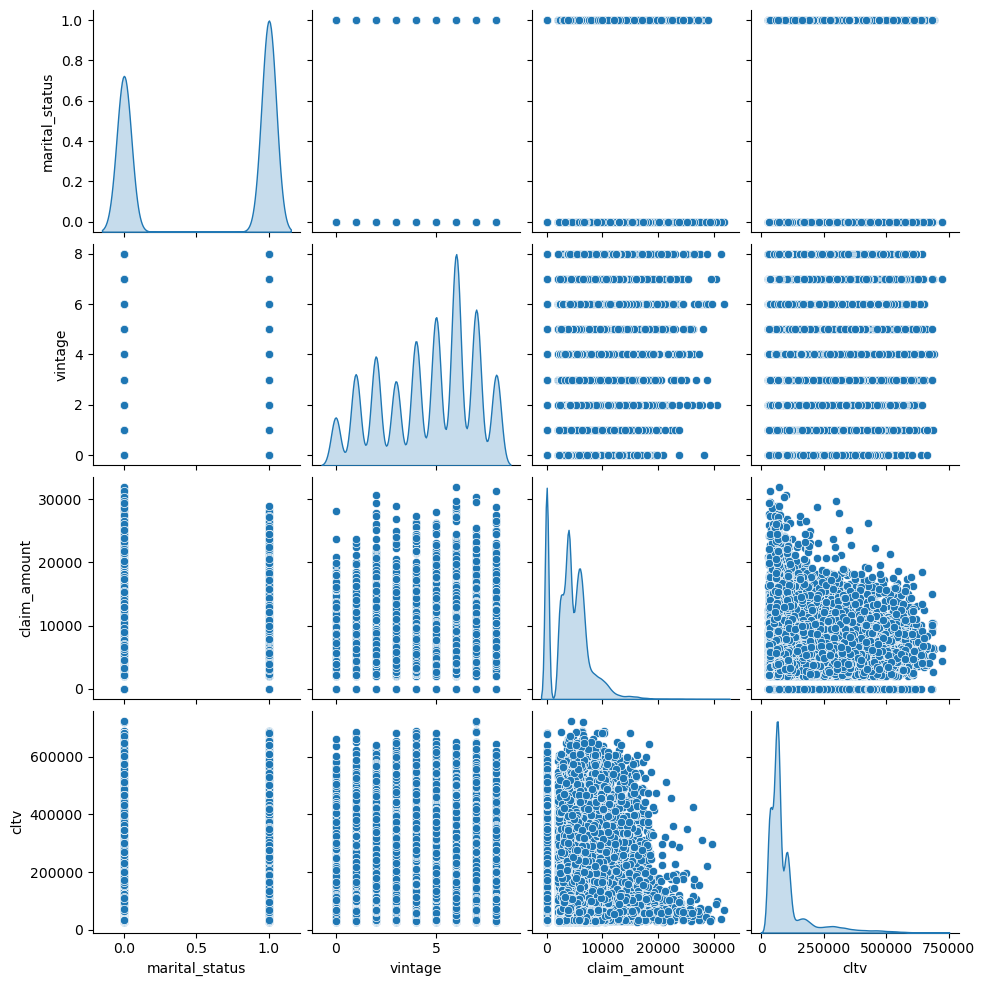

In [239]:
plt.figure(figsize=(6,6))
sns.pairplot(data=data,diag_kind='kde')

## Count of features

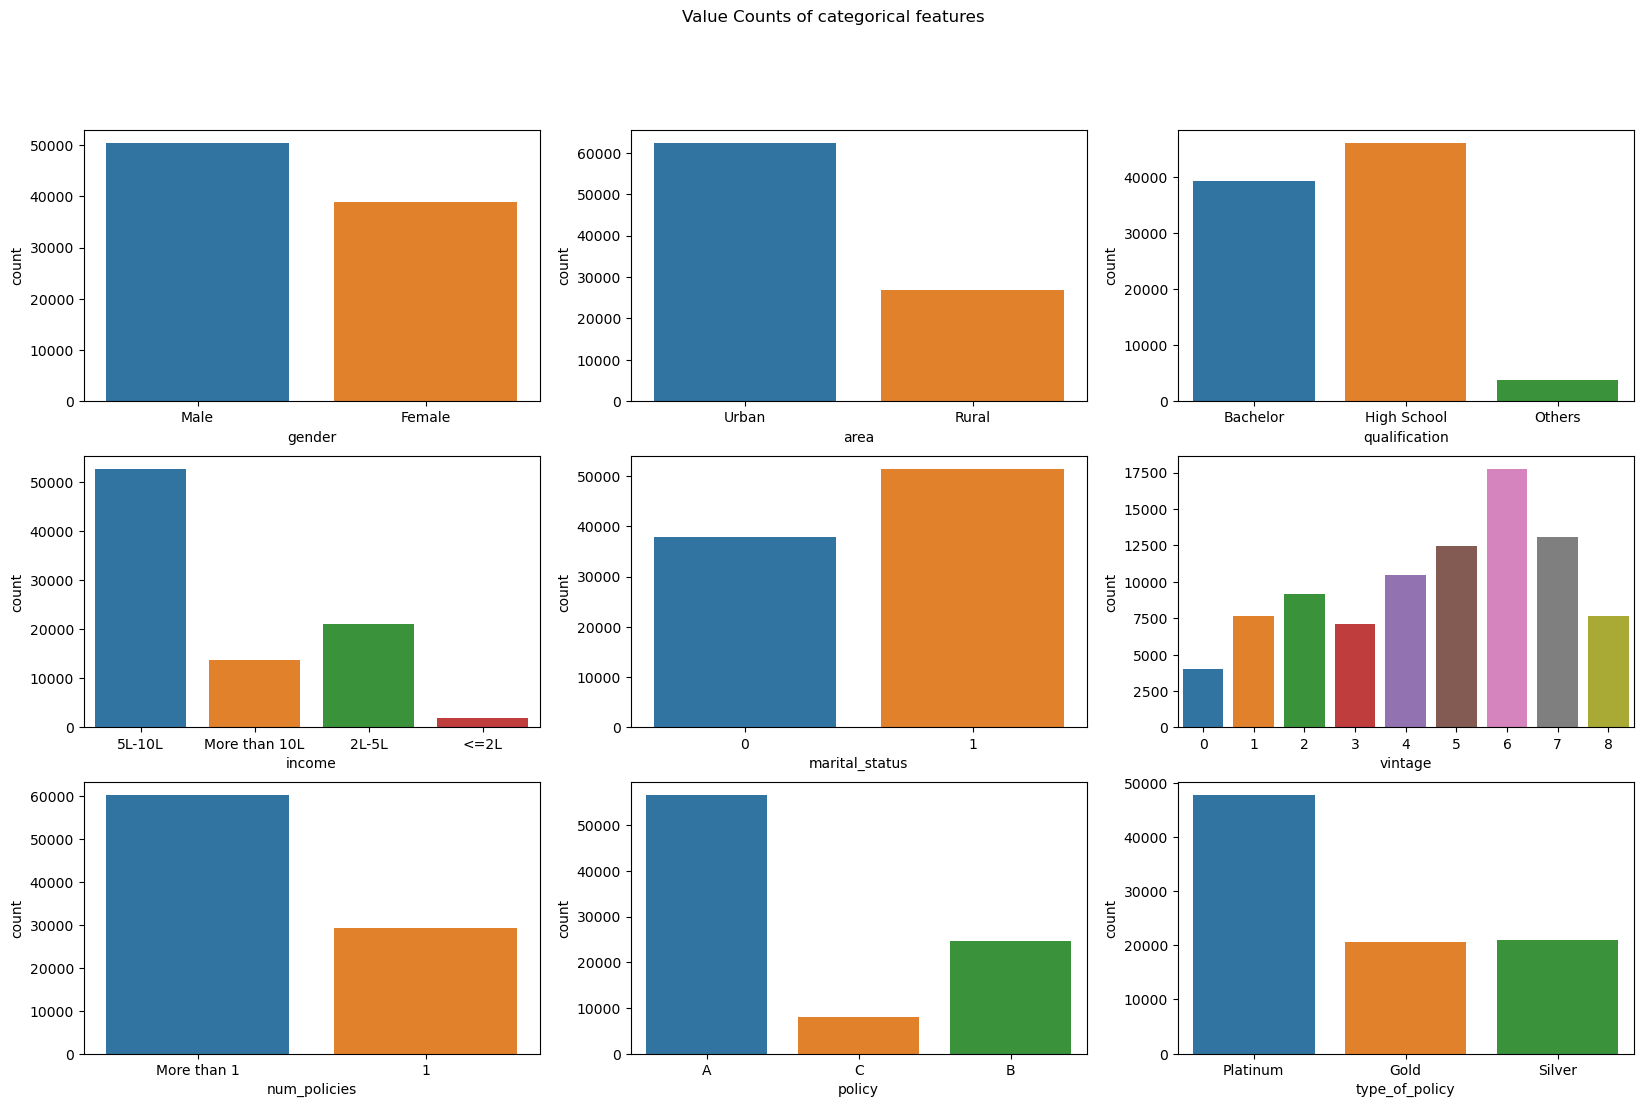

In [240]:
fig, axes = plt.subplots(3,3,  figsize=(20,12))
fig.suptitle('Value Counts of categorical features')
sns.countplot(ax=axes[0,0], x=data['gender'])
sns.countplot(ax=axes[0,1], x=data['area'])
sns.countplot(ax=axes[0,2], x=data['qualification'])
sns.countplot(ax=axes[1,0], x=data['income'])
sns.countplot(ax=axes[1,1], x=data['marital_status'])
sns.countplot(ax=axes[1,2], x=data['vintage'])
sns.countplot(ax=axes[2,0], x=data['num_policies'])
sns.countplot(ax=axes[2,1], x=data['policy'])
sns.countplot(ax=axes[2,2], x=data['type_of_policy'])
plt.show()

## Features v/s cltv

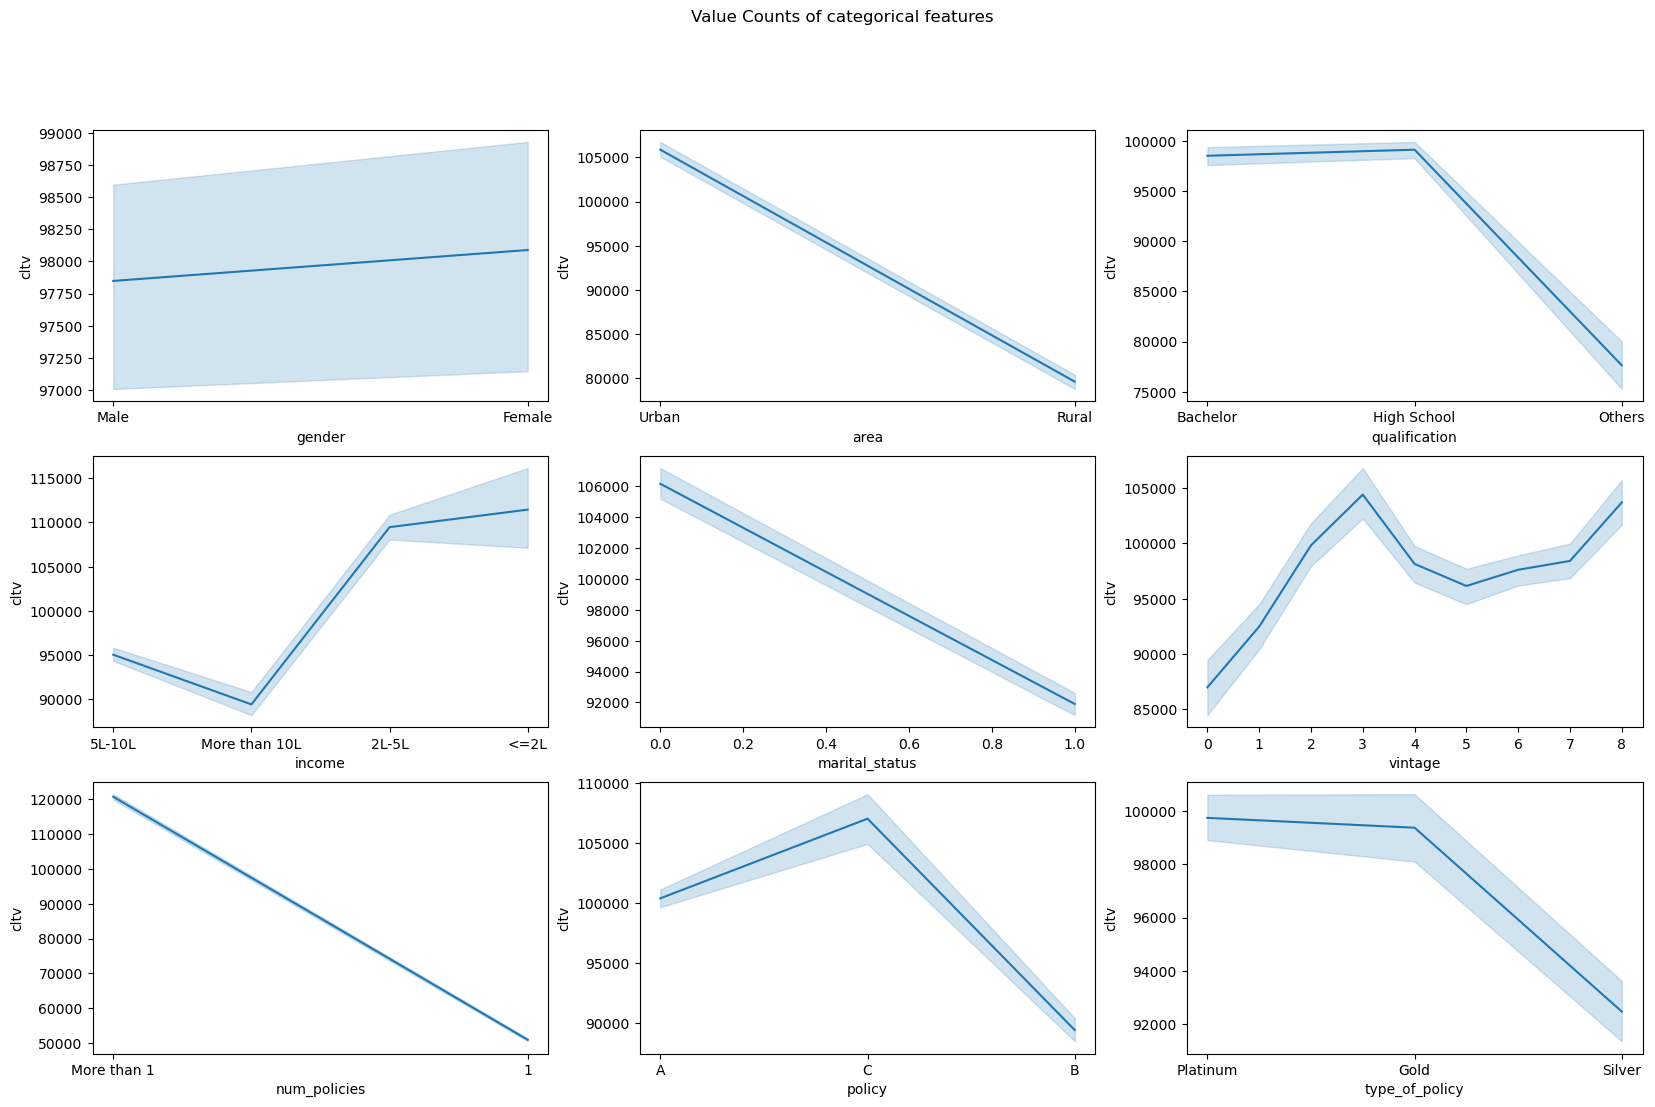

In [241]:
fig, axes = plt.subplots(3,3,  figsize=(20,12))
fig.suptitle('Value Counts of categorical features')
sns.lineplot(ax=axes[0,0], x=data['gender'], y= data['cltv'])
sns.lineplot(ax=axes[0,1], x=data['area'], y= data['cltv'])
sns.lineplot(ax=axes[0,2], x=data['qualification'], y= data['cltv'])
sns.lineplot(ax=axes[1,0], x=data['income'], y= data['cltv'])
sns.lineplot(ax=axes[1,1], x=data['marital_status'], y= data['cltv'])
sns.lineplot(ax=axes[1,2], x=data['vintage'], y= data['cltv'])
sns.lineplot(ax=axes[2,0], x=data['num_policies'], y= data['cltv'])
sns.lineplot(ax=axes[2,1], x=data['policy'], y= data['cltv'])
sns.lineplot(ax=axes[2,2], x=data['type_of_policy'], y= data['cltv'])
plt.show()

## Outlier Detection

C:\Users\iitis\AppData\Local\Temp\ipykernel_16052\2298065003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['claim_amount'],ax=axes[0])


<AxesSubplot: >

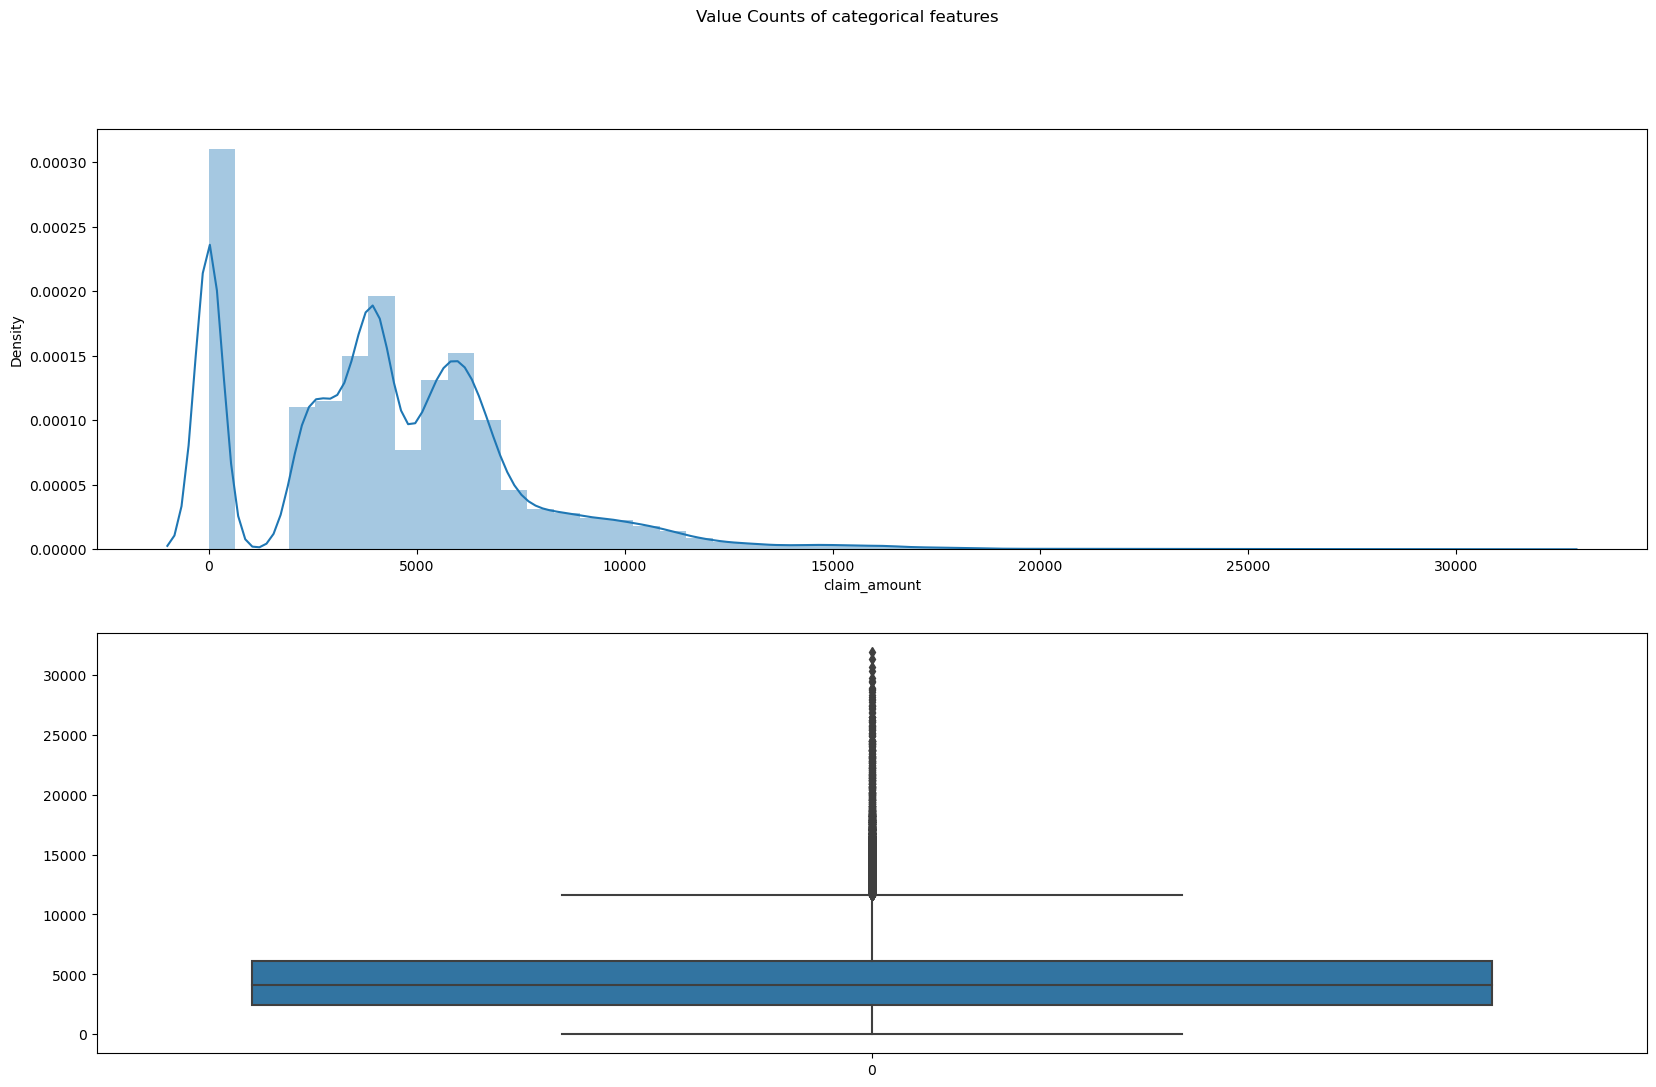

In [242]:
fig, axes = plt.subplots(2,1,  figsize=(20,12))
fig.suptitle('Value Counts of categorical features')
sns.distplot(data['claim_amount'],ax=axes[0])
sns.boxplot(data['claim_amount'],ax=axes[1])

## Feature Transformation

In [243]:
data['gender'].replace(to_replace=['Male', 'Female'], value=[1,0], inplace=True)
data['area'].replace(to_replace=['Urban', 'Rural'], value=[1,0], inplace=True)
data['num_policies'].replace(to_replace=['More than 1', '1'], value=[1,0], inplace=True)

In [244]:
data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,Bachelor,5L-10L,1,5,5790,1,A,Platinum,64308
1,1,0,High School,5L-10L,0,8,5080,1,A,Platinum,515400
2,1,1,Bachelor,5L-10L,1,8,2599,1,A,Platinum,64212
3,0,0,High School,5L-10L,0,7,0,1,A,Platinum,97920
4,1,1,High School,More than 10L,1,6,3508,1,A,Gold,59736


In [245]:
qual=pd.get_dummies(data['qualification'], prefix='qualified')
inc=pd.get_dummies(data['income'], prefix='range')
polc=pd.get_dummies(data['policy'], prefix='policy')
typol=pd.get_dummies(data['type_of_policy'], prefix='premium')
data = pd.concat([data,qual,inc,polc,typol],axis=1)
data.drop(columns=['qualification','income','policy','type_of_policy'], inplace=True)

In [246]:
data.head()

,gender,area,marital_status,vintage,claim_amount,num_policies,cltv,qualified_Bachelor,qualified_High School,qualified_Others,range_2L-5L,range_5L-10L,range_<=2L,range_More than 10L,policy_A,policy_B,policy_C,premium_Gold,premium_Platinum,premium_Silver
0,1,1,1,5,5790,1,64308,1,0,0,0,1,0,0,1,0,0,0,1,0
1,1,0,0,8,5080,1,515400,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,1,1,8,2599,1,64212,1,0,0,0,1,0,0,1,0,0,0,1,0
3,0,0,0,7,0,1,97920,0,1,0,0,1,0,0,1,0,0,0,1,0
4,1,1,1,6,3508,1,59736,0,1,0,0,0,0,1,1,0,0,1,0,0


In [247]:
data.shape

(89392, 20)

## Feature Importance

In [248]:
X_imp = data.drop('cltv',axis=1)
y_imp = data['cltv']
model =GradientBoostingRegressor()
model.fit(X_imp,y_imp)

GradientBoostingRegressor()

In [249]:
pd.Series(model.feature_importances_, index = X_imp.columns).nlargest(19)

num_policies             0.785331
claim_amount             0.136313
area                     0.025688
policy_B                 0.015193
marital_status           0.011160
policy_C                 0.009640
range_2L-5L              0.004995
gender                   0.003116
vintage                  0.002606
qualified_Others         0.002051
premium_Gold             0.001165
range_More than 10L      0.000674
premium_Silver           0.000628
range_5L-10L             0.000488
qualified_Bachelor       0.000482
range_<=2L               0.000205
premium_Platinum         0.000138
qualified_High School    0.000130
policy_A                 0.000000
dtype: float64

## Model making

In [250]:
X = data.drop('cltv',axis=1)
y = data['cltv']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=7)

In [251]:
scaler = RobustScaler()
X_train[['claim_amount']] = scaler.fit_transform(X_train[['claim_amount']])
X_test[['claim_amount']] = scaler.transform(X_test[['claim_amount']])

In [252]:
X_train.head()

,gender,area,marital_status,vintage,claim_amount,num_policies,qualified_Bachelor,qualified_High School,qualified_Others,range_2L-5L,range_5L-10L,range_<=2L,range_More than 10L,policy_A,policy_B,policy_C,premium_Gold,premium_Platinum,premium_Silver
57138,1,1,0,6,0.134037,1,0,1,0,0,1,0,0,0,1,0,0,1,0
11906,0,0,0,5,-0.562145,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2204,0,1,1,2,-0.062009,1,0,1,0,0,1,0,0,0,0,1,0,1,0
68882,0,1,1,1,-1.107771,1,0,1,0,0,1,0,0,1,0,0,0,1,0
52080,0,1,1,4,-0.037368,0,0,1,0,0,1,0,0,1,0,0,0,0,1


In [253]:
def testing(model,X_train,y_train,X_test,y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    return r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

In [254]:
lin_reg = LinearRegression()
las_reg = Lasso()
rid_reg = Ridge()
rf_reg = RandomForestRegressor()
adab_reg = AdaBoostRegressor()
gdb_reg = GradientBoostingRegressor()
cat_reg = CatBoostRegressor()

In [274]:
r2s = []
maes =[]
rmses = []
models = [lin_reg,las_reg,rid_reg,rf_reg,adab_reg,gdb_reg,cat_reg]
for model in models:
    a,b,c = testing(model,X_train,y_train,X_test,y_test)
    r2s.append(a)
    maes.append(b)
    rmses.append(c)

In [255]:
model_gdb = GradientBoostingRegressor()
model_gdb.fit(X_train, y_train)
yhat = model_gdb.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.16209379995756001, 50325.838646954246, 82929.88452951804)

## Cross Validation

In [261]:
param_grid = {'n_estimators': [100, 80, 60, 50, 45, 40, 35, 30],  
              'max_depth': [3, 4, 5, 6],
              'learning_rate' :[0.2, 0.15, 0.1, 0.05]
             }           
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, refit = True, verbose = 0, n_jobs=-1)
grid_result= grid.fit(X_train,y_train)

In [262]:
best_params = grid_result.best_params_

In [263]:
best_params

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}

In [264]:
best_model = GradientBoostingRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], learning_rate=best_params["learning_rate"])

In [265]:
best_model.fit(X_train, y_train)
yhat = best_model.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.16207381331535997, 50233.715480188075, 82930.87359013471)

In [223]:
Q1 = np.percentile(data['claim_amount'], 25,interpolation = 'midpoint') 
Q3 = np.percentile(data['claim_amount'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

C:\Users\iitis\AppData\Local\Temp\ipykernel_16052\884048954.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['claim_amount'], 25,interpolation = 'midpoint')
C:\Users\iitis\AppData\Local\Temp\ipykernel_16052\884048954.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['claim_amount'], 75,interpolation = 'midpoint')


In [228]:
new_data = data
upper = new_data['claim_amount'].mean() + 3*new_data['claim_amount'].std()
lower = new_data['claim_amount'].mean() - 3*new_data['claim_amount'].std()
new_data['claim_amount'] = np.where(new_data['claim_amount']>upper,upper,np.where(new_data['claim_amount']<lower,lower,new_data['claim_amount']))

In [229]:
X = trimmed_data.drop('cltv',axis=1)
y = trimmed_data['cltv']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=7)

In [230]:
scaler = StandardScaler()
X_train[['claim_amount']] = scaler.fit_transform(X_train[['claim_amount']])
X_test[['claim_amount']] = scaler.transform(X_test[['claim_amount']])

In [231]:
model_gdb = GradientBoostingRegressor()
model_gdb.fit(X_train, y_train)
yhat = model_gdb.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.15322051146202953, 50553.932842594935, 84206.3801189743)

## Feature Engineering

In [189]:
data.columns

Index(['gender', 'area', 'marital_status', 'vintage', 'claim_amount',
       'num_policies', 'cltv', 'qualified_Bachelor', 'qualified_High School',
       'qualified_Others', 'range_2L-5L', 'range_5L-10L', 'range_<=2L',
       'range_More than 10L', 'policy_A', 'policy_B', 'policy_C',
       'premium_Gold', 'premium_Platinum', 'premium_Silver'],
      dtype='object')

In [190]:
features=['gender', 'area', 'marital_status', 'vintage', 'claim_amount',
       'num_policies', 'qualified_Bachelor', 'qualified_High School',
       'qualified_Others', 'range_2L-5L', 'range_5L-10L', 'range_<=2L',
       'range_More than 10L', 'policy_A', 'policy_B', 'policy_C',
       'premium_Gold', 'premium_Platinum', 'premium_Silver']

kmeans = KMeans(n_clusters=2)
kmeans.fit(data[features])

#data['cust_type'] = kmeans.predict(data[features])
data['cust_type'] = kmeans.labels_

In [191]:
data.head()

,gender,area,marital_status,vintage,claim_amount,num_policies,cltv,qualified_Bachelor,qualified_High School,qualified_Others,...,range_5L-10L,range_<=2L,range_More than 10L,policy_A,policy_B,policy_C,premium_Gold,premium_Platinum,premium_Silver,cust_type
0,1,1,1,5,5790,1,64308,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,1,0,0,8,5080,1,515400,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,1,1,1,8,2599,1,64212,1,0,0,...,1,0,0,1,0,0,0,1,0,1
3,0,0,0,7,0,1,97920,0,1,0,...,1,0,0,1,0,0,0,1,0,1
4,1,1,1,6,3508,1,59736,0,1,0,...,0,0,1,1,0,0,1,0,0,1


In [192]:
cat=['gender', 'area', 'marital_status', 'vintage',
       'num_policies', 'qualified_Bachelor', 'qualified_High School',
       'qualified_Others', 'range_2L-5L', 'range_5L-10L', 'range_<=2L',
       'range_More than 10L', 'policy_A', 'policy_B', 'policy_C',
       'premium_Gold', 'premium_Platinum', 'premium_Silver']
for i in cat:
    print(i, pointbiserialr(data[i], data['cltv']))

gender PointbiserialrResult(correlation=-0.0013177035556888497, pvalue=0.6936045223756614)
area PointbiserialrResult(correlation=0.13310736330790232, pvalue=0.0)
marital_status PointbiserialrResult(correlation=-0.07774390078802536, pvalue=7.207849478673013e-120)
vintage PointbiserialrResult(correlation=0.0206084583551819, pvalue=7.174701302473242e-10)
num_policies PointbiserialrResult(correlation=0.36041354037155554, pvalue=0.0)
qualified_Bachelor PointbiserialrResult(correlation=0.005511473428499955, pvalue=0.09938610860473103)
qualified_High School PointbiserialrResult(correlation=0.013329487637874967, pvalue=6.735590623537805e-05)
qualified_Others PointbiserialrResult(correlation=-0.046897811461250966, pvalue=1.0321911258280186e-44)
range_2L-5L PointbiserialrResult(correlation=0.07076083889296103, pvalue=1.37942257026886e-99)
range_5L-10L PointbiserialrResult(correlation=-0.03824940448338365, pvalue=2.638174730752364e-30)
range_<=2L PointbiserialrResult(correlation=0.021667988323678

In [193]:
data['policy_age']=data['vintage'].apply(lambda x:1 if x > 4 else 0 )

In [194]:
X = data.drop(['cltv','policy_age'],axis=1)
y = data['cltv']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=7)

In [195]:
scaler = StandardScaler()
X_train[['claim_amount']] = scaler.fit_transform(X_train[['claim_amount']])
X_test[['claim_amount']] = scaler.transform(X_test[['claim_amount']])

In [196]:
X_train.head()

,gender,area,marital_status,vintage,claim_amount,num_policies,qualified_Bachelor,qualified_High School,qualified_Others,range_2L-5L,range_5L-10L,range_<=2L,range_More than 10L,policy_A,policy_B,policy_C,premium_Gold,premium_Platinum,premium_Silver,cust_type
57138,1,1,0,6,0.069199,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1
11906,0,0,0,5,-0.717785,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1
2204,0,1,1,2,-0.152418,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1
68882,0,1,1,1,-1.334577,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1
52080,0,1,1,4,-0.124562,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1


In [197]:
model_gdb = GradientBoostingRegressor()
model_gdb.fit(X_train, y_train)
yhat = model_gdb.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.16206681598306139, 50326.28100949581, 82931.21985790749)

In [198]:
param_grid = {'n_estimators': [100, 80, 60, 50, 45],  
              'max_depth': [3, 4, 5, 6],
              'learning_rate' :[0.2, 0.15]
             }           
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, refit = True, verbose = 0, n_jobs=-1)
grid_result= grid.fit(X_train,y_train)

In [199]:
best_params = grid_result.best_params_

In [200]:
best_model = GradientBoostingRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], learning_rate=best_params["learning_rate"])

In [201]:
best_model.fit(X_train, y_train)
yhat = best_model.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.16211959671506304, 50298.357784417385, 82928.6079316202)

## Creating submissions

In [266]:
test = pd.read_csv('data/test_koRSKBP.csv')
test_data = test.drop('id',axis=1)
test_data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [267]:
def preprocess(data):
    data['gender'].replace(to_replace=['Male', 'Female'], value=[1,0], inplace=True)
    data['area'].replace(to_replace=['Urban', 'Rural'], value=[1,0], inplace=True)
    data['num_policies'].replace(to_replace=['More than 1', '1'], value=[1,0], inplace=True)
    qual=pd.get_dummies(data['qualification'], prefix='qualified')
    inc=pd.get_dummies(data['income'], prefix='range')
    polc=pd.get_dummies(data['policy'], prefix='policy')
    typol=pd.get_dummies(data['type_of_policy'], prefix='premium')
    data = pd.concat([data,qual,inc,polc,typol],axis=1)
    data.drop(columns=['qualification','income','policy','type_of_policy'], inplace=True)
    return data

In [268]:
test_data = preprocess(test_data)

In [269]:
test_data[['claim_amount']] = scaler.transform(test_data[['claim_amount']])
test_data.head()

,gender,area,marital_status,vintage,claim_amount,num_policies,qualified_Bachelor,qualified_High School,qualified_Others,range_2L-5L,range_5L-10L,range_<=2L,range_More than 10L,policy_A,policy_B,policy_C,premium_Gold,premium_Platinum,premium_Silver
0,0,0,0,6,-0.529921,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1,0,1,0,4,0.002979,1,0,1,0,1,0,0,0,1,0,0,0,1,0
2,1,0,1,7,-0.315732,1,0,1,0,0,1,0,0,0,1,0,1,0,0
3,0,0,1,2,-1.107771,1,1,0,0,0,0,0,1,0,1,0,0,0,1
4,0,1,0,5,2.699161,1,0,1,0,1,0,0,0,0,1,0,0,0,1


In [270]:
yhat = best_model.predict(test_data)

In [271]:
yhat

array([ 90105.42355017, 130953.35979272,  93435.54302663, ...,
       105824.90348089, 107958.49013267, 117394.3770079 ])

In [272]:
ids = test['id']
ids

0         89393
1         89394
2         89395
3         89396
4         89397
          ...  
59590    148983
59591    148984
59592    148985
59593    148986
59594    148987
Name: id, Length: 59595, dtype: int64

In [273]:
subm = {'id':ids,'cltv':yhat}
result = pd.DataFrame(subm)
result.to_csv('submission.csv', index = False)